In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x104FCCC70>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


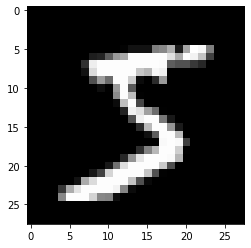

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


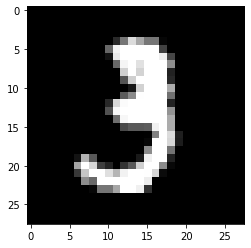

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


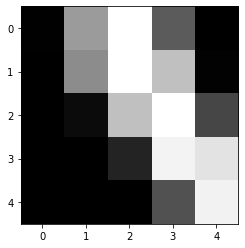

In [13]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

In [17]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [18]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [19]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0204, -0.0300, -0.0327,  ..., -0.0235,  0.0290,  0.0179],
         [-0.0166,  0.0042,  0.0080,  ...,  0.0246, -0.0312,  0.0119],
         [-0.0088,  0.0345, -0.0164,  ..., -0.0049, -0.0281, -0.0259],
         ...,
         [ 0.0046,  0.0078, -0.0203,  ...,  0.0187, -0.0225, -0.0123],
         [-0.0312,  0.0139,  0.0036,  ...,  0.0273, -0.0020, -0.0199],
         [ 0.0012,  0.0054, -0.0299,  ...,  0.0034,  0.0014,  0.0102]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0212,  0.0237,  0.0165, -0.0263,  0.0053,  0.0139,  0.0232, -0.0142,
          0.0345, -0.0245], requires_grad=True)]

In [20]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1774, -0.2591, -0.2467,  0.1138, -0.0486, -0.0753,  0.1490, -0.2380,
         -0.0016,  0.0292],
        [ 0.1101,  0.0703, -0.3353,  0.0044, -0.1202, -0.0731,  0.1149, -0.2527,
         -0.0447,  0.0316]])


In [21]:
import torch.nn.functional as F

In [22]:
outputs[:2]

tensor([[ 0.1774, -0.2591, -0.2467,  0.1138, -0.0486, -0.0753,  0.1490, -0.2380,
         -0.0016,  0.0292],
        [ 0.1101,  0.0703, -0.3353,  0.0044, -0.1202, -0.0731,  0.1149, -0.2527,
         -0.0447,  0.0316]], grad_fn=<SliceBackward>)

In [23]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1228, 0.0794, 0.0804, 0.1152, 0.0980, 0.0954, 0.1194, 0.0811, 0.1027,
         0.1059],
        [0.1161, 0.1116, 0.0744, 0.1045, 0.0923, 0.0967, 0.1167, 0.0808, 0.0995,
         0.1074]])
Sum:  1.0


In [24]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 6, 0, 5, 9, 8, 0, 6, 0, 6, 3, 6, 0, 0, 6, 4, 5, 6, 5, 0, 5, 2, 0, 6,
        5, 9, 0, 9, 5, 5, 9, 8, 8, 2, 5, 0, 0, 0, 6, 0, 6, 8, 6, 5, 9, 9, 9, 6,
        9, 9, 9, 8, 9, 5, 6, 3, 0, 3, 6, 0, 0, 0, 3, 0, 0, 8, 0, 0, 6, 8, 0, 9,
        9, 5, 5, 0, 0, 6, 0, 4, 6, 6, 0, 8, 2, 0, 6, 6, 3, 6, 5, 6, 3, 0, 6, 5,
        0, 3, 0, 6, 4, 0, 8, 3, 5, 0, 6, 6, 0, 8, 0, 3, 6, 0, 6, 3, 1, 0, 4, 0,
        3, 5, 0, 5, 9, 0, 0, 6])
tensor([0.1228, 0.1167, 0.1355, 0.1519, 0.1241, 0.1220, 0.1809, 0.1095, 0.1357,
        0.1414, 0.1279, 0.1389, 0.1457, 0.1164, 0.1630, 0.1423, 0.1253, 0.1453,
        0.1144, 0.1292, 0.1216, 0.1437, 0.1766, 0.1289, 0.1280, 0.1136, 0.1113,
        0.1253, 0.1238, 0.1237, 0.1325, 0.1277, 0.1198, 0.1326, 0.1480, 0.1297,
        0.1301, 0.1289, 0.1277, 0.1469, 0.1346, 0.1103, 0.1277, 0.1152, 0.1286,
        0.1186, 0.1136, 0.1172, 0.1171, 0.1257, 0.1312, 0.1194, 0.1198, 0.1314,
        0.1152, 0.1140, 0.1285, 0.1302, 0.1190, 0.1268, 0.1230, 0.1401, 0.1176,
       

In [25]:
labels

tensor([8, 7, 0, 5, 6, 3, 3, 7, 8, 6, 2, 6, 4, 4, 3, 9, 7, 0, 7, 8, 7, 3, 2, 0,
        5, 4, 5, 6, 7, 7, 3, 1, 9, 4, 0, 4, 4, 5, 0, 8, 0, 4, 3, 8, 9, 9, 5, 6,
        5, 5, 3, 9, 3, 5, 6, 1, 3, 3, 4, 7, 2, 0, 1, 2, 4, 7, 8, 8, 5, 9, 8, 6,
        6, 0, 3, 8, 2, 6, 0, 6, 5, 9, 5, 7, 7, 6, 2, 9, 8, 6, 2, 2, 4, 0, 6, 1,
        0, 2, 7, 3, 7, 2, 1, 6, 5, 2, 9, 6, 8, 1, 3, 7, 3, 6, 3, 7, 6, 0, 2, 5,
        7, 5, 2, 1, 8, 2, 2, 5])

In [26]:
outputs[:2]

tensor([[ 0.1774, -0.2591, -0.2467,  0.1138, -0.0486, -0.0753,  0.1490, -0.2380,
         -0.0016,  0.0292],
        [ 0.1101,  0.0703, -0.3353,  0.0044, -0.1202, -0.0731,  0.1149, -0.2527,
         -0.0447,  0.0316]], grad_fn=<SliceBackward>)

In [27]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [28]:
accuracy(outputs, labels)

tensor(0.1719)

In [29]:
probs

tensor([[0.1228, 0.0794, 0.0804,  ..., 0.0811, 0.1027, 0.1059],
        [0.1161, 0.1116, 0.0744,  ..., 0.0808, 0.0995, 0.1074],
        [0.1355, 0.0720, 0.1242,  ..., 0.0714, 0.0617, 0.1048],
        ...,
        [0.1331, 0.0947, 0.0911,  ..., 0.0799, 0.1105, 0.0967],
        [0.1282, 0.0979, 0.0842,  ..., 0.0679, 0.0853, 0.0978],
        [0.1100, 0.0917, 0.0796,  ..., 0.1019, 0.0903, 0.0939]],
       grad_fn=<SoftmaxBackward>)

In [30]:
loss_fn = F.cross_entropy

In [31]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3000, grad_fn=<NllLossBackward>)


In [32]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [33]:
l1 = [1, 2, 3, 4, 5]

In [34]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [35]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [36]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [37]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3550493717193604, 'val_acc': 0.07446598261594772}

In [38]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9782, val_acc: 0.5836
Epoch [1], val_loss: 1.7041, val_acc: 0.7009
Epoch [2], val_loss: 1.4993, val_acc: 0.7417
Epoch [3], val_loss: 1.3448, val_acc: 0.7668
Epoch [4], val_loss: 1.2261, val_acc: 0.7831


In [39]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1329, val_acc: 0.7970
Epoch [1], val_loss: 1.0582, val_acc: 0.8046
Epoch [2], val_loss: 0.9971, val_acc: 0.8132
Epoch [3], val_loss: 0.9464, val_acc: 0.8175
Epoch [4], val_loss: 0.9036, val_acc: 0.8219


In [40]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8669, val_acc: 0.8258
Epoch [1], val_loss: 0.8351, val_acc: 0.8292
Epoch [2], val_loss: 0.8073, val_acc: 0.8323
Epoch [3], val_loss: 0.7828, val_acc: 0.8346
Epoch [4], val_loss: 0.7609, val_acc: 0.8368


In [41]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7413, val_acc: 0.8394
Epoch [1], val_loss: 0.7237, val_acc: 0.8414
Epoch [2], val_loss: 0.7076, val_acc: 0.8429
Epoch [3], val_loss: 0.6930, val_acc: 0.8445
Epoch [4], val_loss: 0.6796, val_acc: 0.8464


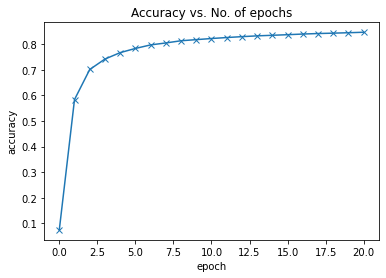

In [42]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [43]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

In [44]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


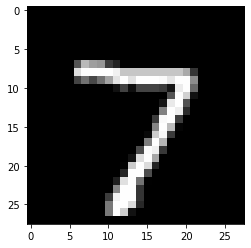

In [45]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


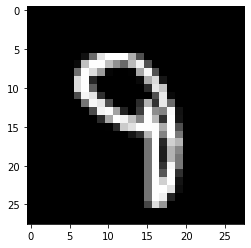

In [46]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


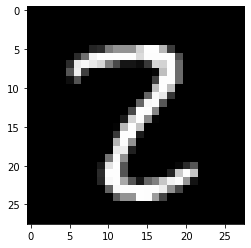

In [47]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [48]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6435826420783997, 'val_acc': 0.8589843511581421}

In [49]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [50]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0216, -0.0353, -0.0142,  ..., -0.0071,  0.0292,  0.0211],
                      [ 0.0229, -0.0264,  0.0045,  ...,  0.0336, -0.0193, -0.0288],
                      [-0.0300,  0.0017, -0.0287,  ...,  0.0201, -0.0014,  0.0327],
                      ...,
                      [-0.0211,  0.0251, -0.0188,  ...,  0.0204,  0.0280, -0.0177],
                      [-0.0150, -0.0202,  0.0104,  ..., -0.0197,  0.0349, -0.0333],
                      [ 0.0277, -0.0173, -0.0169,  ...,  0.0130,  0.0135, -0.0356]])),
             ('linear.bias',
              tensor([-0.0659,  0.1084, -0.0066,  0.0030,  0.0545,  0.0302,  0.0200,  0.0385,
                      -0.0683,  0.0009]))])

In [51]:
model2 = MnistModel()

In [52]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0196, -0.0173,  0.0199,  ..., -0.0314,  0.0296,  0.0328],
                      [ 0.0209, -0.0285,  0.0312,  ...,  0.0097, -0.0289,  0.0049],
                      [ 0.0192, -0.0011,  0.0101,  ...,  0.0188,  0.0075,  0.0080],
                      ...,
                      [-0.0026, -0.0157, -0.0104,  ..., -0.0229, -0.0015, -0.0136],
                      [ 0.0335,  0.0243,  0.0089,  ...,  0.0235, -0.0231, -0.0286],
                      [-0.0102, -0.0270,  0.0082,  ..., -0.0172, -0.0268, -0.0283]])),
             ('linear.bias',
              tensor([-0.0063,  0.0030,  0.0232,  0.0160,  0.0034,  0.0069, -0.0027,  0.0061,
                      -0.0332,  0.0123]))])

In [53]:
evaluate(model2, test_loader)

{'val_loss': 2.321748733520508, 'val_acc': 0.12314452975988388}

In [54]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0216, -0.0353, -0.0142,  ..., -0.0071,  0.0292,  0.0211],
                      [ 0.0229, -0.0264,  0.0045,  ...,  0.0336, -0.0193, -0.0288],
                      [-0.0300,  0.0017, -0.0287,  ...,  0.0201, -0.0014,  0.0327],
                      ...,
                      [-0.0211,  0.0251, -0.0188,  ...,  0.0204,  0.0280, -0.0177],
                      [-0.0150, -0.0202,  0.0104,  ..., -0.0197,  0.0349, -0.0333],
                      [ 0.0277, -0.0173, -0.0169,  ...,  0.0130,  0.0135, -0.0356]])),
             ('linear.bias',
              tensor([-0.0659,  0.1084, -0.0066,  0.0030,  0.0545,  0.0302,  0.0200,  0.0385,
                      -0.0683,  0.0009]))])

In [55]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6435826420783997, 'val_acc': 0.8589843511581421}